Jessica Yoon
<br>Phase4 Project

# <u> X-Ray Diagnostics: Pediatric Pneumonia </u>
The development of a classification model to diagnose pediatric chest x-rays as "normal" or "pneumonia" with convolutional neural networks is detailed in the notebook below.

# I. Importing Downloaded [Data](https://data.mendeley.com/datasets/rscbjbr9sj/3)
The [data](https://data.mendeley.com/datasets/rscbjbr9sj/3) (peditric chest x-rays) was manually downloaded from [Mendeley](https://data.mendeley.com/).  The original data was previously sectioned into training and testing directories each containing images sorted into normal and pneumonia directories. The data was recombined into an overall directory (still depicting normal and pneumonia directory titles) so that it can be resplit as desired into training/testing/validation directories.

## A. Importing Necessary Python Libraries

In [1]:
import os, shutil

## B. Sorting the Data
1. Splitting Original Directories into Train/Test/Validation Directories
2. Loading Directory Paths & Contents into Variables

In [2]:
%%script echo Skipped Cell
# Loading Directory Paths into Variables
original_normal = 'ORIGINAL_DATA/NORMAL'
original_pneumonia = 'ORIGINAL_DATA/PNEUMONIA'

new_dir = 'data/'

train_folder = os.path.join(new_dir, 'train')
train_normal = os.path.join(train_folder, 'normal')
train_pneumonia = os.path.join(train_folder, 'pneumonia')

test_folder = os.path.join(new_dir, 'test')
test_normal = os.path.join(test_folder, 'normal')
test_pneumonia = os.path.join(test_folder, 'pneumonia')

val_folder = os.path.join(new_dir, 'validation')
val_normal = os.path.join(val_folder, 'normal')
val_pneumonia = os.path.join(val_folder, 'pneumonia')

# Creating Split Directories
os.mkdir(new_dir)

os.mkdir(test_folder)
os.mkdir(test_normal)
os.mkdir(test_pneumonia)

os.mkdir(train_folder)
os.mkdir(train_normal)
os.mkdir(train_pneumonia)

os.mkdir(val_folder)
os.mkdir(val_normal)
os.mkdir(val_pneumonia)

Skipped Cell


In [3]:
## CELL INTENDED TO RE-ESTABLISH VARIABLES ##
## FROM DEAD/RESTARTED KERNELS ##

# Loading Directory Paths into Variables
original_normal = 'ORIGINAL_DATA/NORMAL'
original_pneumonia = 'ORIGINAL_DATA/PNEUMONIA'

train_folder = 'data/train'
train_normal = 'data/train/normal'
train_pneumonia = 'data/train/pneumonia'

test_folder = 'data/test'
test_normal = 'data/test/normal'
test_pneumonia = 'data/test/pneumonia'

val_folder = 'data/validation'
val_normal = 'data/validation/normal'
val_pneumonia = 'data/validation/pneumonia'

In [4]:
# Exploring Raw Source Data

# Number of Images in NORMAL Directory
imgs_normal = [file for file in os.listdir(
    original_normal) if file.endswith('.jpeg')]
print(len(imgs_normal), 'images in NORMAL directory')

# Number of Images in PNEUMONIA Directory
imgs_pneumonia = [file for file in os.listdir(
    original_pneumonia) if file.endswith('.jpeg')]
print(len(imgs_pneumonia), 'images in PNEUMONIA directory')

1583 images in NORMAL directory
4273 images in PNEUMONIA directory


In [5]:
%%script echo Skipped Cell
# Copying Raw Data into Split Directories

# train normal
imgs = imgs_normal[:1200]
for img in imgs:
    origin = os.path.join(original_normal, img)
    destination = os.path.join(train_normal, img)
    shutil.copyfile(origin, destination)

# test normal
imgs = imgs_normal[1200:1383]
for img in imgs:
    origin = os.path.join(original_normal, img)
    destination = os.path.join(test_normal, img)
    shutil.copyfile(origin, destination)

# validation normal
imgs = imgs_normal[1383:]
for img in imgs:
    origin = os.path.join(original_normal, img)
    destination = os.path.join(val_normal, img)
    shutil.copyfile(origin, destination)

# train pneumonia
imgs = imgs_pneumonia[:3900]
for img in imgs:
    origin = os.path.join(original_pneumonia, img)
    destination = os.path.join(train_pneumonia, img)
    shutil.copyfile(origin, destination)

# test pneumonia
imgs = imgs_pneumonia[3900:4073]
for img in imgs:
    origin = os.path.join(original_pneumonia, img)
    destination = os.path.join(test_pneumonia, img)
    shutil.copyfile(origin, destination)

# validation pneumonia
imgs = imgs_pneumonia[4073:]
for img in imgs:
    origin = os.path.join(original_pneumonia, img)
    destination = os.path.join(val_pneumonia, img)
    shutil.copyfile(origin, destination)

Skipped Cell


Verifying Data in Split Directories

In [6]:
# Number of Images in Each Directory

a1 = len(os.listdir(train_normal))
a2 = len(os.listdir(train_pneumonia))
a = a1 + a2
b1 = len(os.listdir(test_normal))
b2 = len(os.listdir(test_pneumonia))
b = b1 + b2
c1 = len(os.listdir(val_normal))
c2 = len(os.listdir(val_pneumonia))
c = c1 + c2

print(a, 'images in train directory')
print(b, 'images in test directory')
print(c, 'images in validation directory')

5100 images in train directory
356 images in test directory
400 images in validation directory


# II. Preprocessing Data
Although the data has been previously sorted and organized into the directories according to their "normal" or "pneumonia" labels, the images themselves are rescaled and reshaped in order to help reduce the time needed to train the model.

## A. Importing Necessary Python Libraries

In [7]:
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import (
    ImageDataGenerator, array_to_img, 
    img_to_array, load_img)

## B. Resizing and Reshaping Data

In [8]:
# flow_from_directory Variables
targetimagesize_ = (150, 150)
trainbatchsize_ = a
testbatchsize_ = b
valbatchsize_ = c

# Reshape Data in train Directory
train_generator = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    train_folder, 
    target_size = targetimagesize_,
    batch_size = trainbatchsize_)

# Reshape Data in test Directory
test_generator = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    test_folder, 
    target_size = targetimagesize_,
    batch_size = testbatchsize_)

# Reshape Data in validation Directory
val_generator = ImageDataGenerator(
    rescale=1./255).flow_from_directory(
    val_folder, 
    target_size = targetimagesize_,
    batch_size = valbatchsize_)

Found 5100 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [9]:
# Load Dataset into Variables
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [10]:
# Exploring Final Datasets
m_train = train_images.shape[0]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5100
Number of testing samples: 356
Number of validation samples: 400
train_images shape: (5100, 150, 150, 3)
train_labels shape: (5100, 2)
test_images shape: (356, 150, 150, 3)
test_labels shape: (356, 2)
val_images shape: (400, 150, 150, 3)
val_labels shape: (400, 2)


In [11]:
# Reshaping into 2-D Array

train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5100, 67500)
(356, 67500)
(400, 67500)


In [12]:
# Loading y Variables as 2-D Array

train_y = np.reshape(train_labels[:,0], (trainbatchsize_,1))
test_y = np.reshape(test_labels[:,0], (testbatchsize_,1))
val_y = np.reshape(val_labels[:,0], (valbatchsize_,1))

input_shape_ = train_img.shape[1]

# III. Modeling

## A. Importing Necessary Python Libraries

In [13]:
# Importing Python Libraries to Fit Models
from keras.models import Sequential
from keras.layers import (
    Conv2D, Dense, Flatten, MaxPooling2D)
from keras import optimizers

# Importing Python Libraries for Analysis
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, roc_curve, auc,
    confusion_matrix)

%matplotlib inline

## B. Baseline Model
### 1. Building the Model

In [14]:
# Building the Model

def Build_Baseline():
    model = Sequential()
    model.add(Dense(20, activation='relu',
                           input_shape=(input_shape_,)))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [15]:
# Timer Start
start = datetime.datetime.now()

In [16]:
base = Build_Baseline()
basehist = base.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
160/160 [==============================] - 1s 8ms/step - loss: 0.5361 - acc: 0.7590 - val_loss: 0.7159 - val_acc: 0.5000
Epoch 2/50
160/160 [==============================] - 1s 8ms/step - loss: 0.3773 - acc: 0.8178 - val_loss: 0.6063 - val_acc: 0.6575
Epoch 3/50
160/160 [==============================] - 1s 8ms/step - loss: 0.2826 - acc: 0.8886 - val_loss: 0.3099 - val_acc: 0.8625
Epoch 4/50
160/160 [==============================] - 1s 8ms/step - loss: 0.2386 - acc: 0.8976 - val_loss: 0.3263 - val_acc: 0.8550
Epoch 5/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1940 - acc: 0.9243 - val_loss: 0.3606 - val_acc: 0.8300
Epoch 6/50
160/160 [==============================] - 1s 8ms/step - loss: 0.2130 - acc: 0.9206 - val_loss: 0.4830 - val_acc: 0.7875
Epoch 7/50
160/160 [==============================] - 1s 8ms/step - loss: 0.1864 - acc: 0.9273 - val_loss: 0.3722 - val_acc: 0.8350
Epoch 8/50
160/160 [==============================] - 1s 8ms/step - loss: 0.

In [17]:
# Timer End
end = datetime.datetime.now()
elapsed = end - start
print('Training Elapsed Time: {}'.format(elapsed))

Training Elapsed Time: 0:01:04.207171


### 2. Analyzing the Model

In [18]:
# Loading Variables for Analysis

results_train = base.evaluate(train_img, train_y)
results_test = base.evaluate(test_img, test_y)

pred_y = base.predict(test_img).ravel()

fpr_, tpr_, thresholds_ = roc_curve(test_y, pred_y)
auc_ = auc(fpr_, tpr_)

12/12 [==============================] - 0s 2ms/step - loss: 0.1967 - acc: 0.9213


In [19]:
# Evaluation Results
print ('Train Results:', results_train)
print ('Test Results:', results_test)

Train Results: [0.11892931163311005, 0.9566666483879089]
Test Results: [0.1967228651046753, 0.9213483333587646]


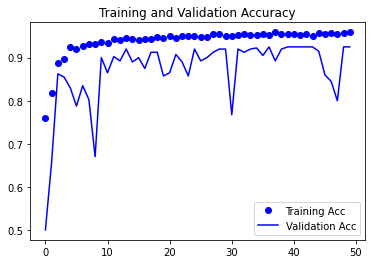

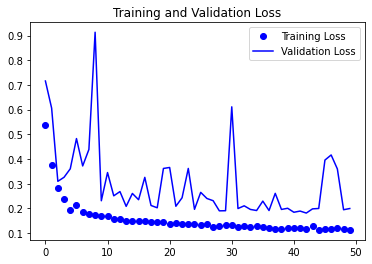

In [20]:
acc = basehist.history['acc']
val_acc = basehist.history['val_acc']
loss = basehist.history['loss']
val_loss = basehist.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [21]:
# Predicting Normal/Pneumonia of Test Group-
# Determining Diagnosis @ Halfway Point
# of Logistic Regression Curve
pred_y = (base.predict(test_img).ravel() > 0.5).astype(int)

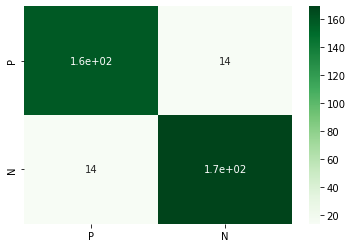

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       173
         1.0       0.92      0.92      0.92       183

    accuracy                           0.92       356
   macro avg       0.92      0.92      0.92       356
weighted avg       0.92      0.92      0.92       356



In [22]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='Greens', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [23]:
print('False Normal Rate:', (11/b2)*100)

False Normal Rate: 6.358381502890173


### 3. Optimizing the Model
Reducing the rate at which the model predicts "Normal" when actual values are "Pneumonia" to prevent misdiagnosis.

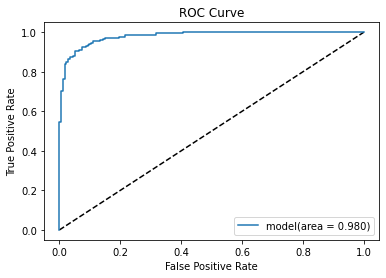

In [24]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_,
         label='model(area = {:.3f})'.format(auc_))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [25]:
auc_

0.9796898196405446

In [26]:
# Rescaling Normal/Pneumonia Diagnosis using AUC Value
pred_y = (base.predict(test_img).ravel() > auc_).astype(int)

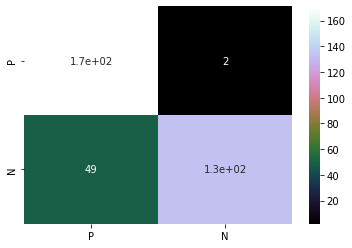

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       173
         1.0       0.99      0.73      0.84       183

    accuracy                           0.86       356
   macro avg       0.88      0.86      0.86       356
weighted avg       0.88      0.86      0.85       356



In [27]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='cubehelix', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [28]:
print('False Normal Rate:', (2/b2)*100)

False Normal Rate: 1.1560693641618496


### 4. Saving the Model

In [29]:
base.save('XRAY_Baseline_Model.h5')

## CNN Model
### 1. Building the Model

In [30]:
# Building the Model

def Build_CNN():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu',
                     input_shape=(150 ,150,  3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (4, 4), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [31]:
# Timer Start
start = datetime.datetime.now()

In [32]:
cnn = Build_CNN()
history = cnn.fit(train_images,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/50
160/160 [==============================] - 61s 380ms/step - loss: 0.5130 - acc: 0.7708 - val_loss: 0.5581 - val_acc: 0.6950
Epoch 2/50
160/160 [==============================] - 58s 365ms/step - loss: 0.3733 - acc: 0.8410 - val_loss: 0.3906 - val_acc: 0.8300
Epoch 3/50
160/160 [==============================] - 59s 368ms/step - loss: 0.2646 - acc: 0.8937 - val_loss: 0.3256 - val_acc: 0.8625
Epoch 4/50
160/160 [==============================] - 60s 374ms/step - loss: 0.2054 - acc: 0.9218 - val_loss: 0.3241 - val_acc: 0.8750
Epoch 5/50
160/160 [==============================] - 60s 377ms/step - loss: 0.1907 - acc: 0.9259 - val_loss: 0.3654 - val_acc: 0.8450
Epoch 6/50
160/160 [==============================] - 61s 379ms/step - loss: 0.1656 - acc: 0.9378 - val_loss: 0.2482 - val_acc: 0.9075
Epoch 7/50
160/160 [==============================] - 61s 383ms/step - loss: 0.1582 - acc: 0.9418 - val_loss: 0.2230 - val_acc: 0.9100
Epoch 8/50
160/160 [==============================] - 6

In [33]:
# Timer End
end = datetime.datetime.now()
elapsed = end - start
print('Training Elapsed Time: {}'.format(elapsed))

Training Elapsed Time: 0:51:30.924207


### 2. Analyzing the Model

In [34]:
# Loading Variables for Analysis

results_train = cnn.evaluate(train_images, train_y)
results_test = cnn.evaluate(test_images, test_y)

pred_y = cnn.predict(test_images).ravel()

fpr_, tpr_, thresholds_ = roc_curve(test_y, pred_y)
auc_ = auc(fpr_, tpr_)

12/12 [==============================] - 1s 59ms/step - loss: 0.2865 - acc: 0.9213


In [35]:
# Results
print ('Train Results:', results_train)
print ('Test Results:', results_test)

Train Results: [0.037786077708005905, 0.9845098257064819]
Test Results: [0.2864915132522583, 0.9213483333587646]


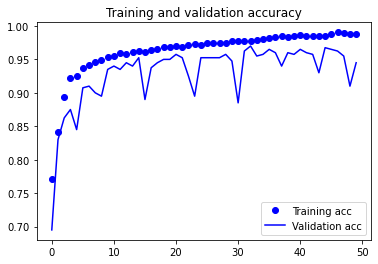

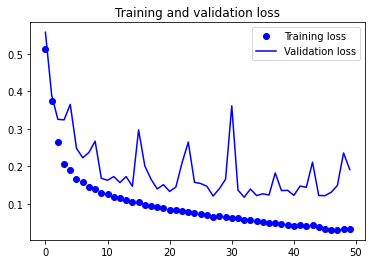

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
# Predicting Normal/Pneumonia of Test Group-
# Determining Diagnosis @ Halfway Point
# of Logistic Regression Curve
pred_y = (cnn.predict(test_images).ravel() > 0.5).astype(int)

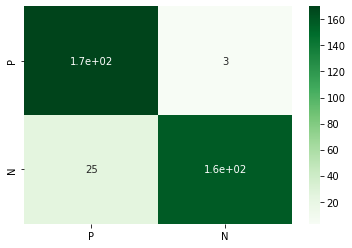

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       173
         1.0       0.98      0.86      0.92       183

    accuracy                           0.92       356
   macro avg       0.93      0.92      0.92       356
weighted avg       0.93      0.92      0.92       356



In [38]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='Greens', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [39]:
print('False Normal Rate:', (3/b2)*100)

False Normal Rate: 1.7341040462427744


### 3. Optimizing the Model
Reducing the rate at which the model predicts "Normal" when actual values are "Pneumonia" to prevent misdiagnosis.

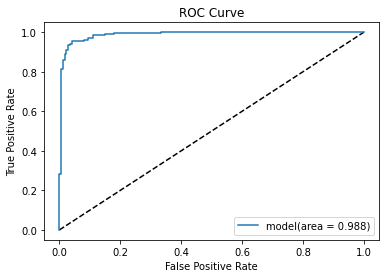

In [40]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_,
         label='model(area = {:.3f})'.format(auc_))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [41]:
auc_

0.9875864683028523

In [42]:
# Rescaling Normal/Pneumonia Diagnosis using AUC Value
pred_y = (cnn.predict(test_images).ravel() > auc_).astype(int)

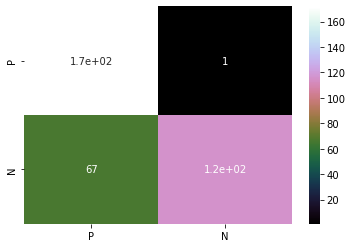

              precision    recall  f1-score   support

         0.0       0.72      0.99      0.83       173
         1.0       0.99      0.63      0.77       183

    accuracy                           0.81       356
   macro avg       0.86      0.81      0.80       356
weighted avg       0.86      0.81      0.80       356



In [43]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
f = sns.heatmap(cm, annot=True, cmap='cubehelix', 
                xticklabels='PN', yticklabels='PN')
plt.show()

# Classification Report
print(classification_report(test_y, pred_y))

In [44]:
print('False Normal Rate:', (1/b2)*100)

False Normal Rate: 0.5780346820809248


### 4. Saving the Model

In [45]:
cnn.save('XRAY_CNN_Model.h5')

# IV. Visualizing Model's Classification Process
## A. Importing Necessary Python Libraries

In [46]:
from keras.models import load_model
from keras.preprocessing import image
from keras import models
import math 
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## B. Breaking Down the Process
### 1. Loading the CNN Model to Visualize

In [47]:
model = load_model('XRAY_CNN_Model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)            

### 2. Sample Test Image
Choosing and viewing the sample test image to be observed in the process.

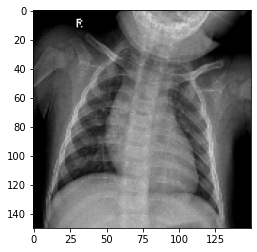

In [48]:
filename = 'data/test/normal/NORMAL-7725506-0001.jpeg'
img = image.load_img(filename, target_size=(150, 150))
plt.imshow(img)
plt.show()

Viewing the Image as Tensor

(1, 150, 150, 3)


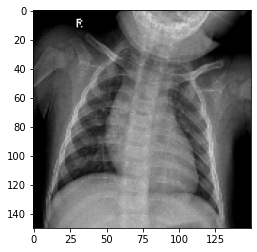

In [49]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Follow the Original Model Preprocessing
img_tensor /= 255.

# Check tensor shape
print(img_tensor.shape)

# Preview an image
plt.imshow(img_tensor[0])
plt.show()

Visualizing the Image Processed through the Activation Layers

<ipython-input-50-2441043dfcd8>:40: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


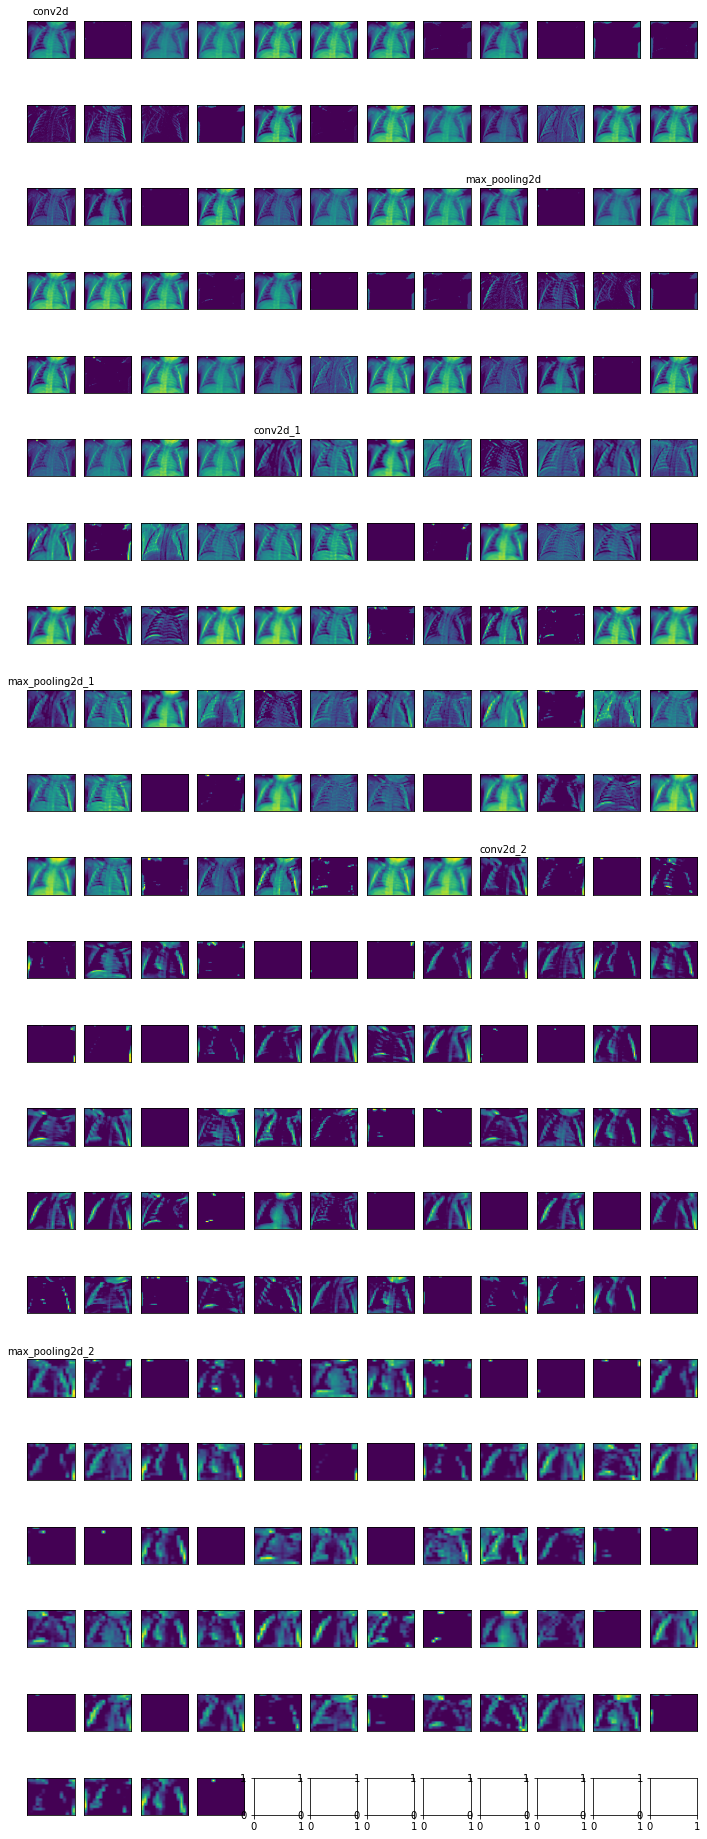

In [50]:
# Extract model layer outputs
layer_outputs = [
    layer.output for layer in model.layers[:6]]

# Create a model for displaying the feature maps
activation_model = models.Model(
    inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# Extract Layer Names for Labelling
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 12
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, 
                          figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                         :, :,
                                         ch_idx]

        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 32
        channel_image += 64
        channel_image = np.clip(
            channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', 
                  cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()